# 1. Install Dependencies and Setup

**1.1 Let's setup Kaggle**

1. Visit https://www.kaggle.com/
2. Create an account
3. Go to 'Settings'
4. Under the 'Account' tab, select 'Create New Token'
5. Kaggle will download a kaggle.json object.
6. Relocate this object from 'Downloads' to ~/.kaggle (Kaggle will look for the object at ~/.kaggle/kaggle.json)

Now, your terminal will have access to the 'kaggle' keyword

**1.2 Now, setup the python environment**

1. Download python3 if you don't have it installed
2. Run: `python3 -m venv env`
3. Run: `source env/bin/activate`

You should now be inside running a python virtual environment

**1.3 once in the virtual environment, we will install dependencies and fetch our database!**

1. Run: `pip install -r requirements.txt`
2. Run: `kaggle datasets download -d moltean/fruits`
3. Run: `unzip fruits.zip`

**•You should now have both the resized 100x100 dataset and the original size dataset as directories in your working directory.**

**Note: it makes sense to just use the 100x100 dataset to reduce training time.**

**It also has way more classes than the full-size set**

If you have all the requirements installed, we should be able to do the following:

Note: The first time you do this in Visual Studio Code, it may ask you which Python environment to use. Select the one you previously initialized.

In [1]:
import tensorflow as tf
import os

2025-02-02 12:10:23.220977: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-02 12:10:23.231992: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-02 12:10:23.334620: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-02 12:10:23.411452: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738516223.493178   19573 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738516223.52

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
# This was in a tutorial. Not sure if it's really necessary but run just in case..

## IMPORTANT: If you are on Windows, uncomment this line: ##
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

2025-02-02 12:10:26.797489: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [3]:
# Shows us which GPUs our system has access to. It's okay if you don't have any.
tf.config.list_physical_devices('GPU')

[]

# 2. Check out our training set

In [4]:
import cv2
from PIL import Image

In [5]:
#TODO: Change 'data' to the name of your training set directory
# You should see a list of classes
data_dir = 'fruits-360_dataset_100x100/fruits-360/Training'
os.listdir(data_dir)

['Peach 2',
 'Cucumber Ripe 2',
 'Hazelnut 1',
 'Pear Monster 1',
 'Fig 1',
 'Watermelon 1',
 'Tomato 2',
 'Onion White 1',
 'Cauliflower 1',
 'Pepper Green 1',
 'Kohlrabi 1',
 'Apple Red Yellow 1',
 'Apple 6',
 'Onion Red Peeled 1',
 'Passion Fruit 1',
 'Grape White 1',
 'Apple Golden 1',
 'Beetroot 1',
 'Lychee 1',
 'Tomato 1',
 'Cucumber 3',
 'Pomelo Sweetie 1',
 'Physalis 1',
 'Nut Forest 1',
 'Limes 1',
 'Clementine 1',
 'Peach Flat 1',
 'Mango Red 1',
 'Orange 1',
 'Grape Pink 1',
 'Pepper Orange 1',
 'Apple Red 2',
 'Cucumber Ripe 1',
 'Plum 1',
 'Grape White 2',
 'Peach 1',
 'Grapefruit White 1',
 'Huckleberry 1',
 'Dates 1',
 'Apple Red 3',
 'Potato Red 1',
 'Apple Red Delicious 1',
 'Pear Forelle 1',
 'Strawberry Wedge 1',
 'Tomato Cherry Red 1',
 'Tomato Yellow 1',
 'Quince 1',
 'Tangelo 1',
 'Granadilla 1',
 'Pepper Yellow 1',
 'Pepper Red 1',
 'Cantaloupe 1',
 'Pineapple 1',
 'Salak 1',
 'Grapefruit Pink 1',
 'Cherry Rainier 1',
 'Pear Stone 1',
 'Kumquats 1',
 'Plum 2',
 

# 3. Load Data

In [6]:
import numpy as np
from matplotlib import pyplot as plt

In [7]:
# This formats our data...
# TODO: Ensure the image size is kept at (100, 100)
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 70491 files belonging to 141 classes.


In [8]:
# Each time we call this, it gives us a new set of data
data_iterator = data.as_numpy_iterator()

In [9]:
# 32 images per batch, 100x100, 3 channels (R, G, B)
batch = data_iterator.next()
batch[0].shape

(32, 256, 256, 3)

# 4. Scale Data

1. Our tensorflow model works with values between 0 and 1.
2. Our images give us pixel R, G, B values from 0-255.

Thus, we need to scale our input data down.

In [10]:
# Hint: Pixel values range from 0-255. We want to scale x to range between 0-1.
# x represents our data, and y represents our class. Therefore, we shouldn't worry about y

# TODO: Uncomment + complete the following statement:
data = data.map(lambda x,y: (x/255, y))

In [11]:
# This will now give us an iterator with our SCALED data!
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()


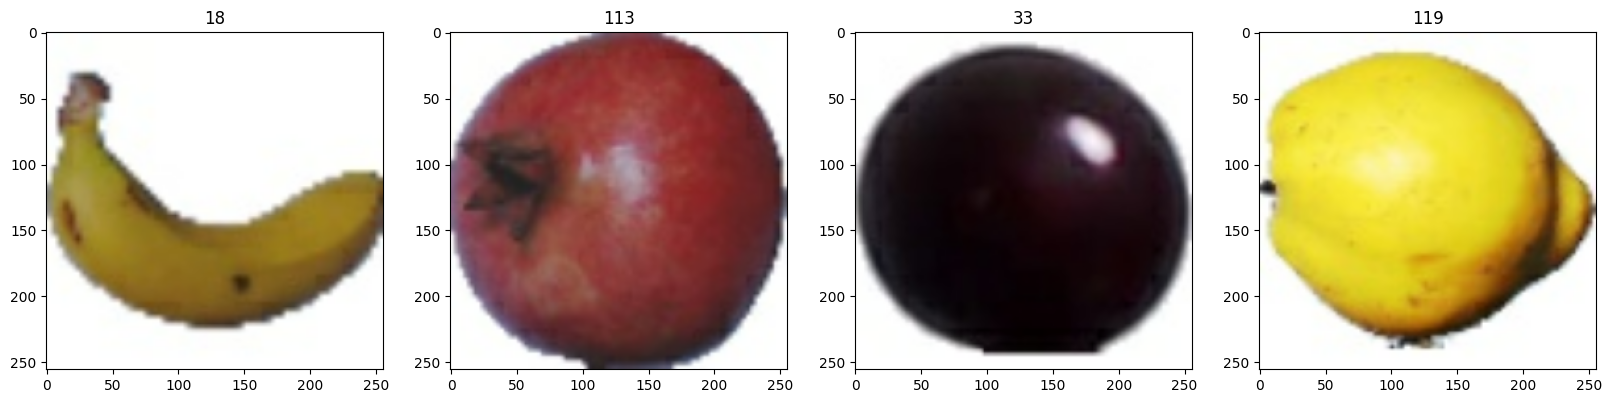

In [12]:
# Once previous TODOs are complete, you should see 4 100x100 images here (of fruits, hopefully)
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

# 5. Include Test Data

1. Now, it's your turn. Do the same steps, except this time with the testing directory...
**Note: for functionality, you'll only need to pattern-match some of the lines**

Found 23619 files belonging to 141 classes.


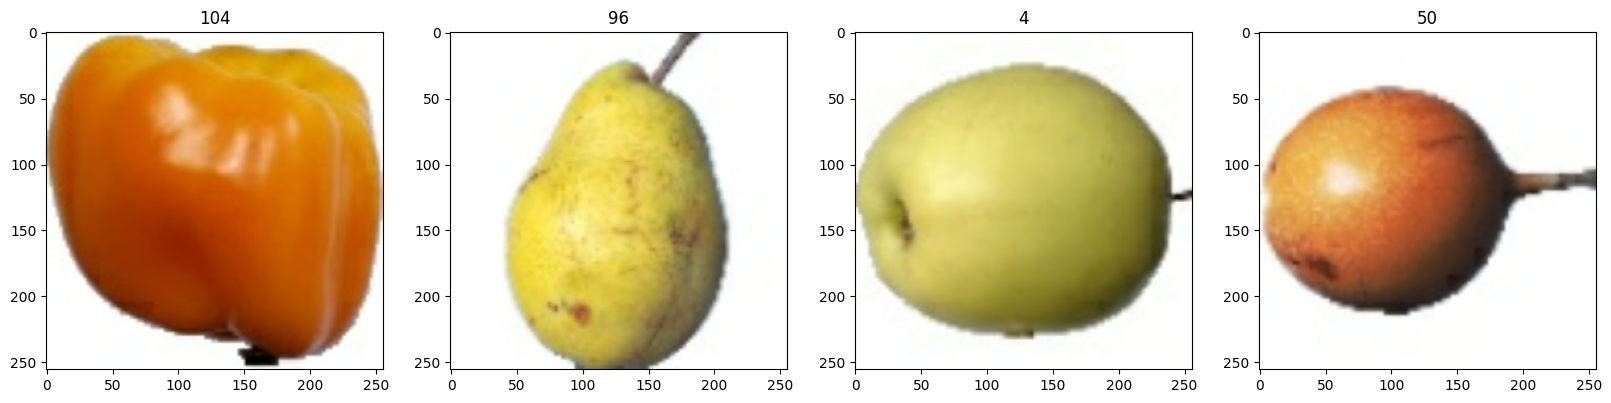

In [13]:
test_data_dir = 'fruits-360_dataset_100x100/fruits-360/Test'
os.listdir(test_data_dir)

# This formats our data...
# TODO: Ensure the image size is kept at (100, 100)
test_data = tf.keras.utils.image_dataset_from_directory(test_data_dir)

# # Each time we call this, it gives us a new set of data
# data_iterator = data.as_numpy_iterator()

# # 32 images per batch, 100x100, 3 channels (R, G, B)
# batch = data_iterator.next()
# batch[0].shape

test_data = test_data.map(lambda x,y: (x/255, y))

# This will now give us an iterator with our SCALED data!
scaled_iterator = test_data.as_numpy_iterator()
batch = scaled_iterator.next()

# Once previous TODOs are complete, you should see 4 100x100 images here (of fruits, hopefully)
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

# 6 Create Validation Set
•Now, we're gonna do something funky!

•Usually, we would have a training, a validation, and a testing set.

•With the 100x100 fruits dataset, we are missing a validation set...

To fix this, we are going to create our validation set by stealing some images from our training set!

However... this can result in issues!
It may result in training data leaving out some of our classes (fruits)...

As an exercise, you can think about what you can do to solve this...

In [14]:
train_size = int(len(data) * 0.7)
val_size = int(len(data) * 0.3)
# Leave our test data alone

# TODO: put in the name of your test_data here
test_size = int(len(test_data))

# TODO: Make sure train_size + val_size + test_size lines up with the total size of your data...
print(train_size + val_size + test_size)

2941


In [15]:
# Notice how we separate the training + validation data...

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = test_data.take(test_size)

# 6. Build Deep Learning Model
(We will get into this more the second week)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.regularizers import l2

In [17]:
model = Sequential()

In [18]:
# TODO: Add in all your layers here...

# First convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Third convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # # Flatten the output
    # Flatten(),
model.add(GlobalAveragePooling2D())
    # Fully connected layer
model.add(Dense(128, activation='relu'))
    
    # Output layer
model.add(Dense(10, activation='softmax'))  # Assuming 10 classes


/home/evanteal15/mdst/mdst-classifer-starter/env/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,050 (433.79 KB)

 Trainable params: 111,050 (433.79 KB)

 Non-trainable params: 0 (0.00 B)

# 7. Train

In [21]:
logdir='logs'

In [22]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [23]:
# TODO: Complete the arguments for model.fit()
hist = model.fit(
	train,
	validation_data=val,
	epochs=1,  # You can adjust the number of epochs as needed
	callbacks=[tensorboard_callback]
)

2025-02-02 12:11:26.496496: W tensorflow/core/framework/op_kernel.cc:1841] OP_REQUIRES failed at sparse_xent_op.cc:103 : INVALID_ARGUMENT: Received a label value of 140 which is outside the valid range of [0, 10).  Label values: 29 134 14 34 29 22 85 72 114 36 1 89 14 22 2 68 51 83 6 11 77 123 129 122 44 130 99 130 91 140 77 129
2025-02-02 12:11:26.496559: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: INVALID_ARGUMENT: Received a label value of 140 which is outside the valid range of [0, 10).  Label values: 29 134 14 34 29 22 85 72 114 36 1 89 14 22 2 68 51 83 6 11 77 123 129 122 44 130 99 130 91 140 77 129
	 [[{{function_node __inference_one_step_on_data_1992}}{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]]


InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/evanteal15/mdst/mdst-classifer-starter/env/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/home/evanteal15/mdst/mdst-classifer-starter/env/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/evanteal15/mdst/mdst-classifer-starter/env/lib/python3.12/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/evanteal15/mdst/mdst-classifer-starter/env/lib/python3.12/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.12/asyncio/base_events.py", line 641, in run_forever

  File "/usr/lib/python3.12/asyncio/base_events.py", line 1987, in _run_once

  File "/usr/lib/python3.12/asyncio/events.py", line 88, in _run

  File "/home/evanteal15/mdst/mdst-classifer-starter/env/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/home/evanteal15/mdst/mdst-classifer-starter/env/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/home/evanteal15/mdst/mdst-classifer-starter/env/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/home/evanteal15/mdst/mdst-classifer-starter/env/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 362, in execute_request

  File "/home/evanteal15/mdst/mdst-classifer-starter/env/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/home/evanteal15/mdst/mdst-classifer-starter/env/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 449, in do_execute

  File "/home/evanteal15/mdst/mdst-classifer-starter/env/lib/python3.12/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/evanteal15/mdst/mdst-classifer-starter/env/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3075, in run_cell

  File "/home/evanteal15/mdst/mdst-classifer-starter/env/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3130, in _run_cell

  File "/home/evanteal15/mdst/mdst-classifer-starter/env/lib/python3.12/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner

  File "/home/evanteal15/mdst/mdst-classifer-starter/env/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3334, in run_cell_async

  File "/home/evanteal15/mdst/mdst-classifer-starter/env/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3517, in run_ast_nodes

  File "/home/evanteal15/mdst/mdst-classifer-starter/env/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code

  File "/tmp/ipykernel_19573/1650678652.py", line 2, in <module>

  File "/home/evanteal15/mdst/mdst-classifer-starter/env/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/evanteal15/mdst/mdst-classifer-starter/env/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 368, in fit

  File "/home/evanteal15/mdst/mdst-classifer-starter/env/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 216, in function

  File "/home/evanteal15/mdst/mdst-classifer-starter/env/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 129, in multi_step_on_iterator

  File "/home/evanteal15/mdst/mdst-classifer-starter/env/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 110, in one_step_on_data

  File "/home/evanteal15/mdst/mdst-classifer-starter/env/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 59, in train_step

  File "/home/evanteal15/mdst/mdst-classifer-starter/env/lib/python3.12/site-packages/keras/src/trainers/trainer.py", line 399, in _compute_loss

  File "/home/evanteal15/mdst/mdst-classifer-starter/env/lib/python3.12/site-packages/keras/src/trainers/trainer.py", line 367, in compute_loss

  File "/home/evanteal15/mdst/mdst-classifer-starter/env/lib/python3.12/site-packages/keras/src/trainers/compile_utils.py", line 692, in __call__

  File "/home/evanteal15/mdst/mdst-classifer-starter/env/lib/python3.12/site-packages/keras/src/trainers/compile_utils.py", line 701, in call

  File "/home/evanteal15/mdst/mdst-classifer-starter/env/lib/python3.12/site-packages/keras/src/losses/loss.py", line 67, in __call__

  File "/home/evanteal15/mdst/mdst-classifer-starter/env/lib/python3.12/site-packages/keras/src/losses/losses.py", line 33, in call

  File "/home/evanteal15/mdst/mdst-classifer-starter/env/lib/python3.12/site-packages/keras/src/losses/losses.py", line 2241, in sparse_categorical_crossentropy

  File "/home/evanteal15/mdst/mdst-classifer-starter/env/lib/python3.12/site-packages/keras/src/ops/nn.py", line 1841, in sparse_categorical_crossentropy

  File "/home/evanteal15/mdst/mdst-classifer-starter/env/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py", line 714, in sparse_categorical_crossentropy

Received a label value of 140 which is outside the valid range of [0, 10).  Label values: 29 134 14 34 29 22 85 72 114 36 1 89 14 22 2 68 51 83 6 11 77 123 129 122 44 130 99 130 91 140 77 129
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_multi_step_on_iterator_2069]